In [67]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn import linear_model, datasets
import sklearn.ensemble as kn
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,make_scorer,precision_recall_curve, roc_curve,auc
import matplotlib.pyplot as plt

In [2]:
#Import train and test set:
X_train = pd.read_csv('X_train_8.csv')
X_test = pd.read_csv('X_test_2.csv')
y_train = pd.read_csv('y_train.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

## Logistic Regression

### Fit the model

In [6]:
print('Performance of Logistic regression on X_test')   
print('------------------------------------------------------------')
# Logistic regression 
model_lg_l1 = linear_model.LogisticRegression(random_state=0,penalty ='l1').fit(X_train,np.ravel(y_train))
model_lg_l2 = linear_model.LogisticRegression(random_state=0,penalty ='l2').fit(X_train,np.ravel(y_train))

Performance of Logistic regression on X_test
------------------------------------------------------------


In [32]:
#Accuracy
acc_l1 = model_lg_l1.score(X_test,y_test)
acc_l2 = model_lg_l2.score(X_test,y_test)
print acc_l1
print acc_l2
#predict
pred1 = model_lg_l1.predict(X_test)
pred
pred2 = model_lg_l2.predict(X_test)

0.703515545621
0.686310370521


In [39]:
#pred = pd.merge(pred1, pred2, left_index=True)
pred2 = pd.DataFrame(pred2, columns = ['pred2'])
pred1 = pd.DataFrame(pred1, columns = ['pred1'])
pred = pd.concat([pred1, pred2],axis=1)
np.savetxt('pred_lg.csv',pred,delimiter=",")

In [13]:
#Confusion matrix
print confusion_matrix(y_test,pred1)

[[   0    0    0    0    0    0    0   14    0    0   12    0]
 [   0    0    0    0    0    0    0   33    0    0   62    0]
 [   0    0    0    0    1    0    0   21    0    0   23    0]
 [   0    1    0    0    1    1    0   61    0    0   68    0]
 [   0    0    0    0    2    0    1  130    0    0  150    2]
 [   0    0    0    0    0    0    0   62    0    0   84    0]
 [   0    0    0    0    1    0    1   89    0    0   85    0]
 [   0    1    1    3    1    2    1 8175    2    0  894    3]
 [   0    0    0    0    0    0    0   19    0    0   17    0]
 [   0    0    0    0    0    0    0    8    0    0    8    0]
 [   0    0    1    0    1    1    1 1785    0    1 2205    3]
 [   0    0    0    0    1    0    0  352    0    0  369    3]]


In [12]:
print confusion_matrix(y_test,pred2)

[[   0    0    0    0    0    0    0   17    0    0    9    0]
 [   0    0    0    0    0    0    0   48    0    0   47    0]
 [   0    0    0    0    0    0    0   26    0    0   19    0]
 [   0    0    0    0    1    1    0   85    0    0   45    0]
 [   0    0    0    0    2    0    1  181    0    0  101    0]
 [   0    0    0    0    0    0    0   87    0    0   59    0]
 [   0    0    0    0    0    0    1  112    0    0   63    0]
 [   0    1    1    2    0    0    0 8497    1    0  580    1]
 [   0    0    0    0    0    0    0   22    0    0   14    0]
 [   0    0    0    0    0    0    0    7    0    0    9    0]
 [   0    0    0    3    0    0    0 2363    0    0 1630    2]
 [   0    0    0    0    1    1    0  444    0    0  277    2]]


In [75]:
pf1 = f1_score(y_test,pred1,average='micro')
pf2 = f1_score(y_test,pred2,average='micro')
print pf1
print pf2

0.703515545621
0.686310370521


In [63]:
#ROC and PR Curve of NDF Category
y_7_test = np.ravel(y_test)==7
prob_test = model_lg_l1.predict_proba(X_test)
fpr, tpr,_ = roc_curve(y_7_test,prob_test[:,7])
precision, recall, _ = precision_recall_curve(y_7_test,prob_test[:,7])

In [65]:
#ROC and PR Curve of US Category
y_10_test = np.ravel(y_test)==10
fpr_1, tpr_1,_ = roc_curve(y_10_test,prob_test[:,10])
precision_1, recall_1, _ = precision_recall_curve(y_10_test,prob_test[:,10])

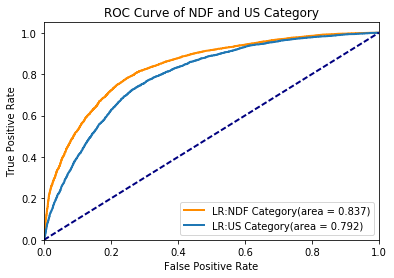

In [73]:
#ROC Curve
auc_1=auc(fpr,tpr)
auc_2=auc(fpr_1,tpr_1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='LR:NDF Category(area = %0.3f)' % auc_1)
plt.plot(fpr_1, tpr_1,
         lw=lw, label='LR:US Category(area = %0.3f)' % auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NDF and US Category')
plt.legend(loc="lower right")
plt.show()

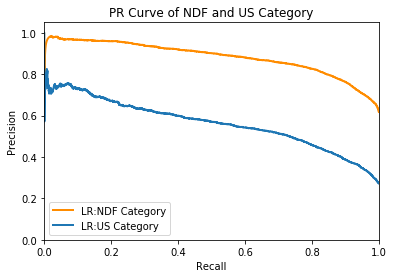

In [72]:
#PR Curve
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='LR:NDF Category')
plt.plot(recall_1, precision_1,
         lw=lw, label='LR:US Category')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve of NDF and US Category')
plt.legend(loc="lower left")
plt.show()